In [2]:
from process_edus import EDUSample

In [3]:
data = EDUSample()
path = r'../LabeledEDUS.txt'
dataset = []

for i in range(1, 6):
    X_train_vector, y_train, X_test_vector, y_test = \
                    data.split_vectorize(path, ngram=(1, i))
    dataset.append({
        'X_train': X_train_vector, 
        'y_train': y_train, 
        'X_test': X_test_vector, 
        'y_test': y_test
    })

=====> DATA LOADED
=====> DATA VECTORIZED
	 ngram range  (1, 1)
                    X_train_vector shape: (1709, 432)
                    y_train shape: (1709,)
                    X_test_vector shape: (855, 432)
                    y_test shape: (855,)        
        
=====> DATA LOADED
=====> DATA VECTORIZED
	 ngram range  (1, 2)
                    X_train_vector shape: (1709, 705)
                    y_train shape: (1709,)
                    X_test_vector shape: (855, 705)
                    y_test shape: (855,)        
        
=====> DATA LOADED
=====> DATA VECTORIZED
	 ngram range  (1, 3)
                    X_train_vector shape: (1709, 763)
                    y_train shape: (1709,)
                    X_test_vector shape: (855, 763)
                    y_test shape: (855,)        
        
=====> DATA LOADED
=====> DATA VECTORIZED
	 ngram range  (1, 4)
                    X_train_vector shape: (1709, 771)
                    y_train shape: (1709,)
                    X_test

In [4]:
data.nzp

(1322, 1577, 1242)

In [1]:
import numpy as np

# Models
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC, NuSVC

# Hyper-parameter tuning
from sklearn.model_selection import GridSearchCV

# Performance 
from sklearn.metrics import make_scorer, classification_report, confusion_matrix
from sklearn.metrics import precision_recall_fscore_support

# Visualiuzations
from matplotlib import pyplot as plt
import seaborn as sns; sns.set()

#### Multinomial Naive Bayes

In [6]:
# trying for varying alphas, didn't find a lot of variation in prediction 

# acc = []
# for ngram in range(len(dataset)):
#     print('==========> NGRAM RANGE ( 1 ,', ngram+1, ')')
#     acc.append([])
#     for alpha in np.linspace(0, 2, 9):
#         print("======> alpha ", alpha)
#         mnb = MultinomialNB(alpha=alpha)
#         c_data = dataset[ngram] 
#         X_train, y_train, X_test, y_test = \
#             c_data['X_train'], c_data['y_train'], c_data['X_test'], c_data['y_test']
#         mnb.fit(X_train, y_train)
#         acc[-1].append(mnb.score(X_test, y_test))

In [5]:
acc = []
preds = []
metric = []
for ngram in range(len(dataset)):
    print('==========> NGRAM RANGE ( 1 ,', ngram+1, ')')
    
    mnb = MultinomialNB(alpha=1.0) 
    
    c_data = dataset[ngram] 
    X_train, y_train, X_test, y_test = \
        c_data['X_train'], c_data['y_train'], c_data['X_test'], c_data['y_test']
    
    mnb.fit(X_train, y_train)
    
    preds.append(mnb.predict(X_test))
    acc.append((mnb.score(X_train, y_train), mnb.score(X_test, y_test)))
    metric.append(precision_recall_fscore_support(y_test, mnb.predict(X_test), average='micro'))

==========> NGRAM RANGE ( 1 , 1 )
==========> NGRAM RANGE ( 1 , 2 )
==========> NGRAM RANGE ( 1 , 3 )
==========> NGRAM RANGE ( 1 , 4 )
==========> NGRAM RANGE ( 1 , 5 )


Plot confusion matrices

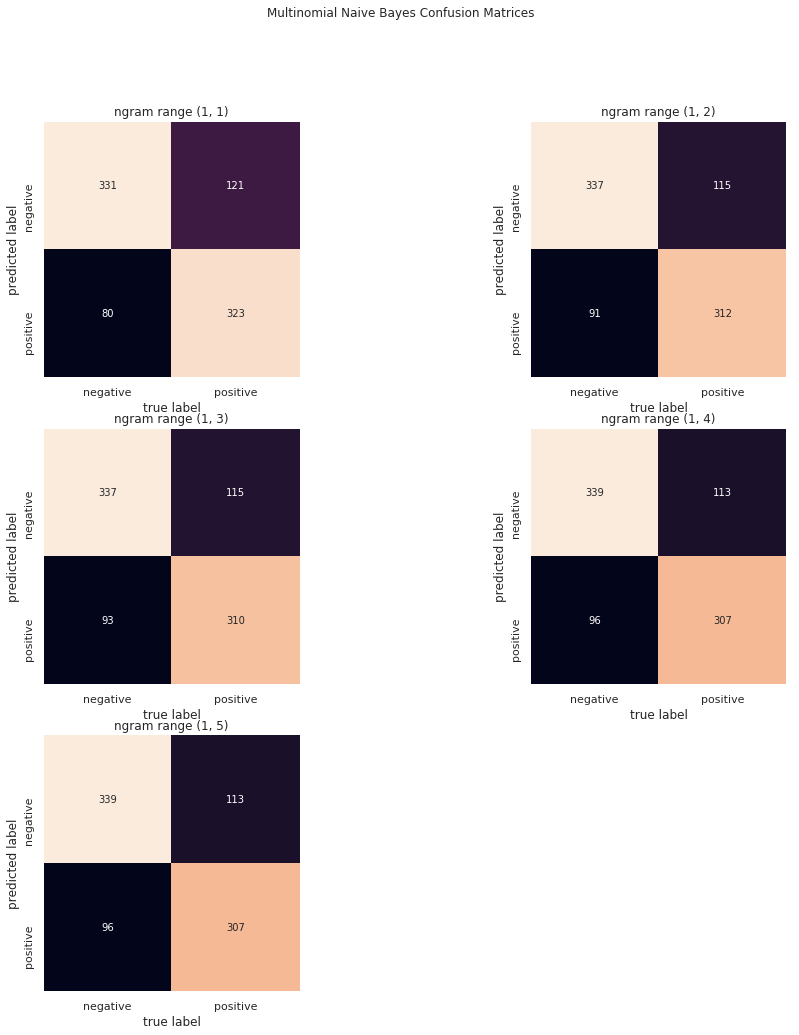

In [15]:
fig = plt.figure(figsize=(16, 16))
fig.suptitle('Multinomial Naive Bayes Confusion Matrices')
#fig.tight_layout()

for ngram in range(len(preds)):    
    axe = fig.add_subplot(3, 2, ngram+1)
    axe.set_title('ngram range (1, {})'.format(ngram+1))
    
    mat = confusion_matrix(preds[ngram], y_test)
    
    sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False, ax=axe,
            xticklabels=['negative', 'positive'], yticklabels=['negative', 'positive'])
    
    plt.xlabel('true label')
    plt.ylabel('predicted label')
    
fig.savefig('mnb_confusion.png')

In [6]:
print('ngram range\t accuracy')
print('----------------------------')
for i in range(len(acc)):
    print('(1, {})\t\t {}'.format(i+1, acc[i]))
    

ngram range	 accuracy
----------------------------
(1, 1)		 (0.85020479812756, 0.7649122807017544)
(1, 2)		 (0.8788765359859567, 0.7590643274853801)
(1, 3)		 (0.8788765359859567, 0.7567251461988304)
(1, 4)		 (0.8782913984786425, 0.7555555555555555)
(1, 5)		 (0.8800468110005851, 0.7555555555555555)


-


**TODO: plot accuracies**

In [7]:
metric

[(0.7649122807017544, 0.7649122807017544, 0.7649122807017544, None),
 (0.7590643274853801, 0.7590643274853801, 0.7590643274853801, None),
 (0.7567251461988304, 0.7567251461988304, 0.7567251461988304, None),
 (0.7555555555555555, 0.7555555555555555, 0.7555555555555555, None),
 (0.7555555555555555, 0.7555555555555555, 0.7555555555555555, None)]